<a href="https://www.kaggle.com/code/concyclics/people-s-daily-wordcloud-visualization?scriptVersionId=91189556" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# People's Daily WordCloud Visualization
#### Author: Concyclics

## Content
In this notebook, we are going to introduce jieba to split chinese words and introduce *wordcloud* to generate a visualization of news keyword like below.
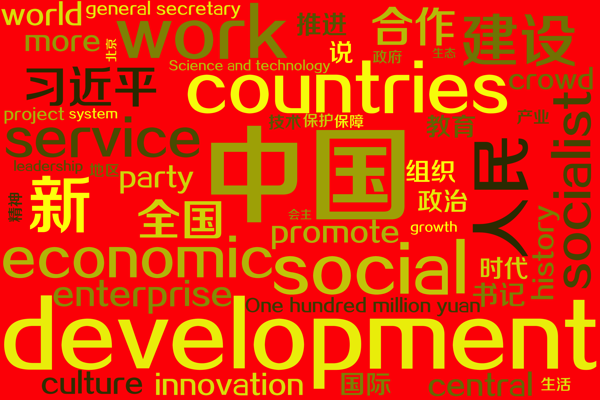

And also we will use *zhon* and some other method to clean the word data.

**Document of  WordCloud**

http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

**basic parameters**

<dl class="field-list">
<dt class="field-odd">Parameters</dt>
<dd class="field-odd"><dl>
<dt><strong>font_path</strong><span class="classifier">string</span></dt><dd><p>Font path to the font that will be used (OTF or TTF).
Defaults to DroidSansMono path on a Linux machine. If you are on
another OS or don’t have this font, you need to adjust this path.</p>
</dd>
<dt><strong>width</strong><span class="classifier">int (default=400)</span></dt><dd><p>Width of the canvas.</p>
</dd>
<dt><strong>height</strong><span class="classifier">int (default=200)</span></dt><dd><p>Height of the canvas.</p>
</dd>
<dt><strong>prefer_horizontal</strong><span class="classifier">float (default=0.90)</span></dt><dd><p>The ratio of times to try horizontal fitting as opposed to vertical.
If prefer_horizontal &lt; 1, the algorithm will try rotating the word
if it doesn’t fit. (There is currently no built-in way to get only
vertical words.)</p>
</dd>
<dt><strong>mask</strong><span class="classifier">nd-array or None (default=None)</span></dt><dd><p>If not None, gives a binary mask on where to draw words. If mask is not
None, width and height will be ignored and the shape of mask will be
used instead. All white (#FF or #FFFFFF) entries will be considerd
“masked out” while other entries will be free to draw on. [This
changed in the most recent version!]</p>
</dd>
<dt><strong>contour_width: float (default=0)</strong></dt><dd><p>If mask is not None and contour_width &gt; 0, draw the mask contour.</p>
</dd>
<dt><strong>contour_color: color value (default=”black”)</strong></dt><dd><p>Mask contour color.</p>
</dd>
<dt><strong>scale</strong><span class="classifier">float (default=1)</span></dt><dd><p>Scaling between computation and drawing. For large word-cloud images,
using scale instead of larger canvas size is significantly faster, but
might lead to a coarser fit for the words.</p>
</dd>
<dt><strong>min_font_size</strong><span class="classifier">int (default=4)</span></dt><dd><p>Smallest font size to use. Will stop when there is no more room in this
size.</p>
</dd>
<dt><strong>font_step</strong><span class="classifier">int (default=1)</span></dt><dd><p>Step size for the font. font_step &gt; 1 might speed up computation but
give a worse fit.</p>
</dd>
<dt><strong>max_words</strong><span class="classifier">number (default=200)</span></dt><dd><p>The maximum number of words.</p>
</dd>
<dt><strong>stopwords</strong><span class="classifier">set of strings or None</span></dt><dd><p>The words that will be eliminated. If None, the build-in STOPWORDS
list will be used. Ignored if using generate_from_frequencies.</p>
</dd>
<dt><strong>background_color</strong><span class="classifier">color value (default=”black”)</span></dt><dd><p>Background color for the word cloud image.</p>
</dd>
<dt><strong>max_font_size</strong><span class="classifier">int or None (default=None)</span></dt><dd><p>Maximum font size for the largest word. If None, height of the image is
used.</p>
</dd>
<dt><strong>mode</strong><span class="classifier">string (default=”RGB”)</span></dt><dd><p>Transparent background will be generated when mode is “RGBA” and
background_color is None.</p>
</dd>
<dt><strong>relative_scaling</strong><span class="classifier">float (default=’auto’)</span></dt><dd><p>Importance of relative word frequencies for font-size.  With
relative_scaling=0, only word-ranks are considered.  With
relative_scaling=1, a word that is twice as frequent will have twice
the size.  If you want to consider the word frequencies and not only
their rank, relative_scaling around .5 often looks good.
If ‘auto’ it will be set to 0.5 unless repeat is true, in which
case it will be set to 0.</p>
</dd>
<dt><strong>color_func</strong><span class="classifier">callable, default=None</span></dt><dd><p>Callable with parameters word, font_size, position, orientation,
font_path, random_state that returns a PIL color for each word.
Overwrites “colormap”.
See colormap for specifying a matplotlib colormap instead.
To create a word cloud with a single color, use
<code class="docutils literal notranslate"><span class="pre">color_func=lambda</span> <span class="pre">*args,</span> <span class="pre">**kwargs:</span> <span class="pre">"white"</span></code>.
The single color can also be specified using RGB code. For example
<code class="docutils literal notranslate"><span class="pre">color_func=lambda</span> <span class="pre">*args,</span> <span class="pre">**kwargs:</span> <span class="pre">(255,0,0)</span></code> sets color to red.</p>
</dd>
<dt><strong>regexp</strong><span class="classifier">string or None (optional)</span></dt><dd><p>Regular expression to split the input text into tokens in process_text.
If None is specified, <code class="docutils literal notranslate"><span class="pre">r"\w[\w']+"</span></code> is used. Ignored if using
generate_from_frequencies.</p>
</dd>
<dt><strong>collocations</strong><span class="classifier">bool, default=True</span></dt><dd><p>Whether to include collocations (bigrams) of two words. Ignored if using
generate_from_frequencies.</p>
</dd>
<dt><strong>colormap</strong><span class="classifier">string or matplotlib colormap, default=”viridis”</span></dt><dd><p>Matplotlib colormap to randomly draw colors from for each word.
Ignored if “color_func” is specified.</p>
</dd>
<dt><strong>normalize_plurals</strong><span class="classifier">bool, default=True</span></dt><dd><p>Whether to remove trailing ‘s’ from words. If True and a word
appears with and without a trailing ‘s’, the one with trailing ‘s’
is removed and its counts are added to the version without
trailing ‘s’ – unless the word ends with ‘ss’. Ignored if using
generate_from_frequencies.</p>
</dd>
<dt><strong>repeat</strong><span class="classifier">bool, default=False</span></dt><dd><p>Whether to repeat words and phrases until max_words or min_font_size
is reached.</p>
</dd>
<dt><strong>include_numbers</strong><span class="classifier">bool, default=False</span></dt><dd><p>Whether to include numbers as phrases or not.</p>
</dd>
<dt><strong>min_word_length</strong><span class="classifier">int, default=0</span></dt><dd><p>Minimum number of letters a word must have to be included.</p>
</dd>
<dt><strong>collocation_threshold: int, default=30</strong></dt><dd><p>Bigrams must have a Dunning likelihood collocation score greater than this
parameter to be counted as bigrams. Default of 30 is arbitrary.</p>
<p>See Manning, C.D., Manning, C.D. and Schütze, H., 1999. Foundations of
Statistical Natural Language Processing. MIT press, p. 162
<a class="reference external" href="https://nlp.stanford.edu/fsnlp/promo/colloc.pdf#page=22">https://nlp.stanford.edu/fsnlp/promo/colloc.pdf#page=22</a></p>
</dd>
</dl>
</dd>
</dl>

**basic methods**

<div class="wy-table-responsive"><table class="longtable docutils align-default">
<colgroup>
<col style="width: 10%">
<col style="width: 90%">
</colgroup>
<tbody>
<tr class="row-odd"><td><p><code class="xref py py-obj docutils literal notranslate"><span class="pre">fit_words</span></code>(frequencies)</p></td>
<td><p>Create a word_cloud from words and frequencies.</p></td>
</tr>
<tr class="row-even"><td><p><code class="xref py py-obj docutils literal notranslate"><span class="pre">generate</span></code>(text)</p></td>
<td><p>Generate wordcloud from text.</p></td>
</tr>
<tr class="row-odd"><td><p><code class="xref py py-obj docutils literal notranslate"><span class="pre">generate_from_frequencies</span></code>(frequencies[,&nbsp;…])</p></td>
<td><p>Create a word_cloud from words and frequencies.</p></td>
</tr>
<tr class="row-even"><td><p><code class="xref py py-obj docutils literal notranslate"><span class="pre">generate_from_text</span></code>(text)</p></td>
<td><p>Generate wordcloud from text.</p></td>
</tr>
<tr class="row-odd"><td><p><code class="xref py py-obj docutils literal notranslate"><span class="pre">process_text</span></code>(text)</p></td>
<td><p>Splits a long text into words, eliminates the stopwords.</p></td>
</tr>
<tr class="row-even"><td><p><code class="xref py py-obj docutils literal notranslate"><span class="pre">recolor</span></code>([random_state,&nbsp;color_func,&nbsp;colormap])</p></td>
<td><p>Recolor existing layout.</p></td>
</tr>
<tr class="row-odd"><td><p><code class="xref py py-obj docutils literal notranslate"><span class="pre">to_array</span></code>()</p></td>
<td><p>Convert to numpy array.</p></td>
</tr>
<tr class="row-even"><td><p><code class="xref py py-obj docutils literal notranslate"><span class="pre">to_file</span></code>(filename)</p></td>
<td><p>Export to image file.</p></td>
</tr>
<tr class="row-odd"><td><p><code class="xref py py-obj docutils literal notranslate"><span class="pre">to_svg</span></code>([embed_font,&nbsp;optimize_embedded_font,&nbsp;…])</p></td>
<td><p>Export to SVG.</p></td>
</tr>
</tbody>
</table></div>

## 1. Load and split

### 1.1 Load newspath

In [1]:
import os

newspath=[]
for dirname, _, filenames in os.walk('../input/renmindaily/data'):
    for filename in filenames:
        newspath.append(os.path.join(dirname, filename))

print("total news: ",len(newspath))

total news:  30623


### 1.2 Preview of news

In [2]:
from random import sample
for eachpath in sample(newspath,k=2):
    print("path: ", eachpath)
    with open(eachpath,'r') as f:
        news=f.read()
        print(news)
        print('\n\n')
    

path:  ../input/renmindaily/data/RenMin_Daily/20210201-09-03.txt
扩大就业规模  改善就业结构
健全就业公共服务体系（新知新觉）

　　就业是最大的民生。千方百计稳定与扩大就业，扩大就业容量、提升就业质量，是保障和改善民生的重要举措，也是全面建成小康社会的必然要求。党的十九届五中全会《建议》提出“强化就业优先政策”，强调“健全就业公共服务体系”，为稳定与扩大就业、推动实现充分就业提供了重要遵循。就业公共服务体系是我国基本公共服务体系的重要组成部分。健全就业公共服务体系，对于扩大就业规模、改善就业结构具有重要意义。
　　推进就业公共服务均等化。就业公共服务包括职业介绍、职业辅导、职业培训等多项内容。良好的服务措施有利于改善劳动力市场状况、减缓失业带来的消极影响、促进用人单位和劳动者有效对接，实现更加充分、更高质量就业。当前，新冠肺炎疫情变化和外部环境存在诸多不确定性，我国经济恢复基础尚不牢固，求职者对就业公共服务的需求进一步增加。加快推进就业公共服务均等化，努力实现不同地区、不同行业、不同群体劳动者享受同等服务，是新发展阶段确保就业形势总体稳定的题中应有之义。要着力推进就业公共服务标准化，规范就业公共服务的基本要求、服务项目和服务方式，统筹调配服务资源，确保在不同区域提供大体相当的服务。在统筹兼顾的同时，推动就业服务资源适当向重点群体倾斜，根据高校毕业生、农民工、退役军人等群体的差异化需求提供有针对性的服务，同时加大对残疾人、零就业家庭等困难群体的帮扶力度，确保就业公共服务体系能有效惠及各个群体，为稳定和扩大就业提供制度保障。
　　促进就业信息和数据互通共享。完备的就业信息是有效开展就业服务的基础和前提。推动就业信息和数据互通共享，有利于降低信息获取成本，对于提高就业公共服务的质量和效率具有重要意义。为此，可进一步推动技术应用和体制机制创新，构建覆盖就业服务部门的数据共享平台，为就业信息的采集、共享、使用提供完善的体系保障；在确保信息安全的前提下，鼓励求职者与相关机构参与信息采集工作，提高相关信息的准确性、及时性和完整性。优化不同部门之间的就业信息共享机制，根据求职者在就业中的多样化需求定向推送就业信息。充分利用互联网、大数据等信息技术，建立就业信息线上联动体系，实现求职者和用人单位即时对接，提高劳动力市

### 1.3 View the split of JieBa

In [3]:
import jieba

from random import sample
for eachpath in sample(newspath,k=1):
    #print("path: ", eachpath)
    with open(eachpath,'r') as f:
        news=f.read()
        print('origin news: ')
        print(news)
        
        print('split by simple mode: ')
        print("/".join(jieba.lcut(news)))
        
        print('split by cut_all mode: ')
        print("/".join(jieba.lcut(news, cut_all=True)))
        
        print('split by search mode: ')
        print("/".join(jieba.lcut_for_search(news)))

Building prefix dict from the default dictionary ...


origin news: 

世界马克思主义政党理论研讨会举行

　　新华社北京5月27日电  中共中央对外联络部27日以视频会议方式举行世界马克思主义政党理论研讨会。中共中央总书记、国家主席习近平向研讨会致贺信，老挝人民革命党中央总书记通伦等多国政党领导人通过书面或视频方式致贺。来自48个国家和地区的马克思主义政党领导人以及中央和国家机关有关部门及高校负责同志共约200人参加。
　　中联部部长宋涛表示，中国共产党坚持把马克思主义基本原理同中国实际相结合，不断推动马克思主义中国化、时代化、大众化，并在新时期创立了习近平新时代中国特色社会主义思想。中国共产党愿同各国马克思主义政党一道，推动世界社会主义进一步发展，为构建人类命运共同体、实现世界人民对美好生活的向往而努力奋斗。
　　与会各国政党领导人盛赞中国共产党百年来带领中国人民取得的辉煌成就和为世界发展进步作出的重要贡献，希望同中国共产党加强团结协作，为世界和平发展事业、人类进步事业和世界社会主义事业作出更大贡献。

split by simple mode: 


Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.264 seconds.
Prefix dict has been built successfully.



/世界/马克思主义/政党/理论/研讨会/举行/
/
/　/　/新华社/北京/5/月/27/日电/ / /中共中央对外联络部/27/日以/视频会议/方式/举行/世界/马克思主义/政党/理论/研讨会/。/中共中央/总书记/、/国家/主席/习近平/向/研讨会/致/贺信/，/老挝人民革命党/中央/总书记/通伦/等/多国/政党/领导人/通过/书面/或/视频/方式/致贺/。/来自/48/个/国家/和/地区/的/马克思主义/政党/领导人/以及/中央/和/国家机关/有关/部门/及/高校/负责同志/共约/200/人/参加/。/
/　/　/中联部/部长/宋涛/表示/，/中国共产党/坚持/把/马克思主义/基本原理/同/中国/实际/相结合/，/不断/推动/马克思主义/中国化/、/时代化/、/大众化/，/并/在/新/时期/创立/了/习近平/新/时代/中国/特色/社会主义/思想/。/中国共产党/愿同/各国/马克思主义/政党/一道/，/推动/世界/社会主义/进一步/发展/，/为/构建/人类/命运/共同体/、/实现/世界/人民/对/美好生活/的/向往/而/努力奋斗/。/
/　/　/与会/各国/政党/领导人/盛赞/中国共产党/百年/来/带领/中国/人民/取得/的/辉煌成就/和/为/世界/发展/进步/作出/的/重要/贡献/，/希望/同/中国共产党/加强团结/协作/，/为/世界/和平/发展/事业/、/人类/进步事业/和/世界/社会主义/事业/作出/更大/贡献/。/

split by cut_all mode: 
/
//世界/马克/马克思/马克思主义/主义/政党/理论/研讨/研讨会/举行//
//
//　//　//新华/新华社/北京/5/月/27/日电// // //中共/中共中央/中共中央对外联络部/中央/中央对外联络部/对外/对外联络部/外联/联络/联络部/27/日/以/视频/视频会议/会议/方式/举行/世界/马克/马克思/马克思主义/主义/政党/理论/研讨/研讨会/。/中共/中共中央/中央/总书记/书记/、/国家/家主/主席/习近平/向/研讨/研讨会/致贺/贺信/，/老挝/老挝人民革命党/人民/民革/革命/革命党/党中央/中央/总书记/书记/通/伦/等/多国/国政/政党/领导/领导人/通过/书面/或/视频/方式/致贺/。/来自/48/个/国家/和/地区/的/马克/马克思/马克思主义/主义/政党

The search mode best fits what we want. It split each possible keywords.

### 1.4 remove space, number and punctuations

#### 1.4.1 remove punctuation before split

In [4]:
!pip install zhon

     |████████████████████████████████| 99 kB 340 kB/s            
  Preparing metadata (setup.py) ... - done
  Created wheel for zhon: filename=zhon-1.1.5-py3-none-any.whl size=84322 sha256=e2b0a6cf167574add00fc66f9ef0098aa7d14c332eb6c0405ca397a55335fc57
  Stored in directory: /root/.cache/pip/wheels/d0/56/17/2675c4c7413a72bf173062e8d0a16503e3b2607745aa84988d
Successfully built zhon


In [5]:
import re
from zhon.hanzi import punctuation as puncZH
from string import punctuation as puncEN

def removePunctuation(s:str):
    s=re.sub(r"[%s]+" %puncZH, "",s)
    s=re.sub(r"[%s]+" %puncEN, "",s)
    s=re.sub(r"[\d\n\t\r]+", "",s)
    return s

In [6]:
from random import choice

news = open(choice(newspath),'r').read()
print(news)


传递温暖 传递力量（民生观）

　　在面临困难时，我们仍然要同舟共济，守望相助，帮助他人，传递温暖，传递力量
　　
　　最近，这样一则视频获得大家称赞：在湖南新田，一栋居民楼三层的房间发生火灾，两名小女孩被困在阳台上，浓烟冒出，情况危急。这时，6名男子迅速沿防盗窗攀爬而上，够着孩子后，接力把她们往下传送，这时候消防员也赶到了，大家合力，最终把孩子救出。网友被他们的见义勇为打动了，纷纷称赞：“感谢好心人出手相救！你们都是英雄！”
　　都是普通人，没有专业设备，也没有火场救人经验，但是，看见有人困在火中，二话不说，上前救助。这种冒着危险救人的勇气，这样的热心和善良，值得我们学习。
　　前一段时间，为了营救被困洪水中的亲人，郑州一名市民通过外卖和点评软件查找事发地附近商家的电话，并请求商家援助，之后又通过朋友圈求助。12人获知消息后，很快相继游向被困的汽车。大家同心协力，用锤子等工具为受困者开辟了生命通道。一方有难、八方驰援，这种守望相助，温暖了人心。
　　守望相助，既能让人们在面对困难时形成合力，也能感染人、教育人，让温暖和善意在人群中得到传播。一方有难，八方支援的壮举不断出现，面临困难时，人们就会有信心，社会也因此充满了凝聚力。
　　事实上，守望相助、团结一心根植在中华民族的文化基因之中。在古代，我们既有“岂曰无衣，与子同袍”的诗句，也有“人心齐，泰山移”的谚语。时至今日，中国人以实际行动守望互助，迸发出同舟共济的巨大力量。我们忘不了千里驰援武汉的最美逆行者，也忘不了河南强降雨时奋战12个小时后席地而眠的武警战士……
　　社会飞速发展，生活半径在扩大，生活节奏在加快。在城市居住，周边邻居也许都是陌生人，但陌生并不意味着冷漠，不相识不意味着不相关。在面临困难时，我们仍然要同舟共济，守望相助，帮助他人，传递温暖，传递力量。



In [7]:
print(removePunctuation(news))

传递温暖 传递力量民生观在面临困难时我们仍然要同舟共济守望相助帮助他人传递温暖传递力量最近这样一则视频获得大家称赞在湖南新田一栋居民楼三层的房间发生火灾两名小女孩被困在阳台上浓烟冒出情况危急这时名男子迅速沿防盗窗攀爬而上够着孩子后接力把她们往下传送这时候消防员也赶到了大家合力最终把孩子救出网友被他们的见义勇为打动了纷纷称赞感谢好心人出手相救你们都是英雄都是普通人没有专业设备也没有火场救人经验但是看见有人困在火中二话不说上前救助这种冒着危险救人的勇气这样的热心和善良值得我们学习前一段时间为了营救被困洪水中的亲人郑州一名市民通过外卖和点评软件查找事发地附近商家的电话并请求商家援助之后又通过朋友圈求助人获知消息后很快相继游向被困的汽车大家同心协力用锤子等工具为受困者开辟了生命通道一方有难八方驰援这种守望相助温暖了人心守望相助既能让人们在面对困难时形成合力也能感染人教育人让温暖和善意在人群中得到传播一方有难八方支援的壮举不断出现面临困难时人们就会有信心社会也因此充满了凝聚力事实上守望相助团结一心根植在中华民族的文化基因之中在古代我们既有岂曰无衣与子同袍的诗句也有人心齐泰山移的谚语时至今日中国人以实际行动守望互助迸发出同舟共济的巨大力量我们忘不了千里驰援武汉的最美逆行者也忘不了河南强降雨时奋战个小时后席地而眠的武警战士社会飞速发展生活半径在扩大生活节奏在加快在城市居住周边邻居也许都是陌生人但陌生并不意味着冷漠不相识不意味着不相关在面临困难时我们仍然要同舟共济守望相助帮助他人传递温暖传递力量


In [8]:
print("/".join(jieba.lcut_for_search(news)))
print("/".join(jieba.lcut_for_search(removePunctuation(news))))


/传递/温暖/ /传递/力量/（/民生/观/）/
/
/　/　/在/面临/困难/时/，/我们/仍然/要/共济/同舟共济/，/守望/相助/守望相助/，/帮助/他人/，/传递/温暖/，/传递/力量/
/　/　/
/　/　/最近/，/这样/一则/视频/获得/大家/称赞/：/在/湖南/新田/，/一栋/居民/居民楼/三层/的/房间/发生/火灾/，/两名/小女/女孩/小女孩/被困/在/阳台/上/，/浓烟/冒/出/，/情况/危急/情况危急/。/这时/，/6/名/男子/迅速/沿/防盗/防盗窗/攀爬/而/上/，/够/着/孩子/后/，/接力/把/她们/往/下/传送/，/这时/时候/这时候/消防/消防员/也/赶到/了/，/大家/合力/，/最终/把/孩子/救出/。/网友/被/他们/的/义勇/勇为/见义勇为/打动/了/，/纷纷/称赞/：/“/感谢/好心/好心人/出手/相救/！/你们/都/是/英雄/！/”/
/　/　/都/是/普通/通人/普通人/，/没有/专业/设备/，/也/没有/火场/救人/经验/，/但是/，/看见/有人/困在/火中/，/二话/二话不说/，/上前/救助/。/这种/危险/冒着危险/救人/的/勇气/，/这样/的/热心/和/善良/，/值得/我们/学习/。/
/　/　/前/一段/时间/段时间/一段时间/，/为了/营救/被困/洪水/中/的/亲人/，/郑州/一名/市民/通过/外卖/和/点评/软件/查找/事发/地/附近/商家/的/电话/，/并/请求/商家/援助/，/之后/又/通过/朋友/朋友圈/求助/。/12/人/获知/消息/后/，/很快/相继/游/向/被困/的/汽车/。/大家/同心/协力/同心协力/，/用/锤子/等/工具/为/受困/受困者/开辟/了/生命/通道/。/一方/一方有难/、/八方/驰援/，/这种/守望/相助/守望相助/，/温暖/了/人心/。/
/　/　/守望/相助/守望相助/，/既能/让/人们/在/面对/困难/时/形成/合力/，/也/能/感染/人/、/教育/人/，/让/温暖/和/善意/在/人群/中/得到/传播/。/一方/一方有难/，/八方/支援/八方支援/的/壮举/不断/出现/，/面临/困难/时/，/人们/就/会/有/信心/，/社会/也/因此/充满/了/凝聚/凝聚力/。/
/　/　/事实/事实上/，/守望/相助/守望相助/、/团结/一心/团结一心/根植/在/中华/民族/中华民

#### 1.4.2 remove after split

In [9]:
import re
from zhon.hanzi import punctuation as puncZH
from string import punctuation as puncEN

def hasPunctuation(s:str):
    f=False
    f|=bool(re.match(r"[%s]+" %puncZH, s))
    f|=bool(re.match(r"[%s]+" %puncEN, s))
    f|=bool(re.match(r"[\d\n\t\r]+", s))
    return f

In [10]:
split_news=jieba.lcut_for_search(news)
removed_split_news=[]
for text in split_news:
    if hasPunctuation(text) is False:
        removed_split_news.append(text)

print("/".join(jieba.lcut_for_search(news)))
print("/".join(removed_split_news))


/传递/温暖/ /传递/力量/（/民生/观/）/
/
/　/　/在/面临/困难/时/，/我们/仍然/要/共济/同舟共济/，/守望/相助/守望相助/，/帮助/他人/，/传递/温暖/，/传递/力量/
/　/　/
/　/　/最近/，/这样/一则/视频/获得/大家/称赞/：/在/湖南/新田/，/一栋/居民/居民楼/三层/的/房间/发生/火灾/，/两名/小女/女孩/小女孩/被困/在/阳台/上/，/浓烟/冒/出/，/情况/危急/情况危急/。/这时/，/6/名/男子/迅速/沿/防盗/防盗窗/攀爬/而/上/，/够/着/孩子/后/，/接力/把/她们/往/下/传送/，/这时/时候/这时候/消防/消防员/也/赶到/了/，/大家/合力/，/最终/把/孩子/救出/。/网友/被/他们/的/义勇/勇为/见义勇为/打动/了/，/纷纷/称赞/：/“/感谢/好心/好心人/出手/相救/！/你们/都/是/英雄/！/”/
/　/　/都/是/普通/通人/普通人/，/没有/专业/设备/，/也/没有/火场/救人/经验/，/但是/，/看见/有人/困在/火中/，/二话/二话不说/，/上前/救助/。/这种/危险/冒着危险/救人/的/勇气/，/这样/的/热心/和/善良/，/值得/我们/学习/。/
/　/　/前/一段/时间/段时间/一段时间/，/为了/营救/被困/洪水/中/的/亲人/，/郑州/一名/市民/通过/外卖/和/点评/软件/查找/事发/地/附近/商家/的/电话/，/并/请求/商家/援助/，/之后/又/通过/朋友/朋友圈/求助/。/12/人/获知/消息/后/，/很快/相继/游/向/被困/的/汽车/。/大家/同心/协力/同心协力/，/用/锤子/等/工具/为/受困/受困者/开辟/了/生命/通道/。/一方/一方有难/、/八方/驰援/，/这种/守望/相助/守望相助/，/温暖/了/人心/。/
/　/　/守望/相助/守望相助/，/既能/让/人们/在/面对/困难/时/形成/合力/，/也/能/感染/人/、/教育/人/，/让/温暖/和/善意/在/人群/中/得到/传播/。/一方/一方有难/，/八方/支援/八方支援/的/壮举/不断/出现/，/面临/困难/时/，/人们/就/会/有/信心/，/社会/也/因此/充满/了/凝聚/凝聚力/。/
/　/　/事实/事实上/，/守望/相助/守望相助/、/团结/一心/团结一心/根植/在/中华/民族/中华民

### 1.5 using remove after split

In [11]:
def getWords(news:str):
    split_news=jieba.lcut_for_search(news)
    removed_split_news=[]
    for text in split_news:
        if hasPunctuation(text) is False:
            removed_split_news.append(text)
    return removed_split_news


In [12]:
words=[]
for path in sample(newspath,k=10000):
    news = open(path,'r').read()
    words += getWords(news)
    
print('total words' ,len(words))

total words 8687377


## 2. Generate Wordcloud

### 2.1 count word frequency

In [13]:
word_count={}
for word in words:
    word_count[word]=word_count.get(word,0)+1
print('total unique words' ,len(word_count))

total unique words 165528


In [14]:
import pandas as pd

word_ds=pd.DataFrame(word_count,index=[0])
word_ds=word_ds.T
word_ds.columns=['count']

In [15]:
word_ds

,count
影像,590
智能,3614
智能化,783
,4742
医疗,3826
...,...
冷藏库,1
魏后凯,1
解放村,1
张天祥,1


**Too many no-meaning words here**

In [16]:
word_ds.sort_values(by=['count'],ascending=False,inplace=True)
word_ds.head(10)

,count
的,311797
和,93276
在,74137
,71207
了,62854
中国,57086
发展,55830
是,44705
为,38591
等,32824


### 2.2 remove stopwords

In [17]:
!wget https://codeload.github.com/Concyclics/stopwords/zip/refs/heads/master
!unzip master

--2022-03-25 07:28:10--  https://codeload.github.com/Concyclics/stopwords/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.113.9
Connecting to codeload.github.com (codeload.github.com)|140.82.113.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master’

master                  [ <=>                ]  13.87K  79.5KB/s    in 0.2s    

2022-03-25 07:28:12 (79.5 KB/s) - ‘master’ saved [14200]

Archive:  master
1de4e063cdc6b50d1b94392bcd2a5063b468b0be
   creating: stopwords-master/
  inflating: stopwords-master/README.md  
  inflating: stopwords-master/baidu_stopwords.txt  
  inflating: stopwords-master/cn_stopwords.txt  
  inflating: stopwords-master/hit_stopwords.txt  
  inflating: stopwords-master/scu_stopwords.txt  


In [18]:
stopwords=[]

for dirname, _, filenames in os.walk('./stopwords-master'):
    for filename in filenames:
        with open(os.path.join(dirname, filename)) as f:
            if filename.endswith('txt'):
                stopwords+=list(f.read().split())
    
stopwords.append('年')
stopwords.append('月')
stopwords.append('日')
stopwords.append('上')
stopwords.append('中')
stopwords.append('本报')
stopwords.append('\xa0')

stopwords=list(set(stopwords))
print('stopwords in total: ',len(stopwords))

stopwords in total:  2318


In [19]:
for stopword in stopwords:
    if stopword in word_count:
        word_count.pop(stopword) 

print('total unique words without stopwords' ,len(word_count))

total unique words without stopwords 164247


In [20]:
word_ds=pd.DataFrame(word_count,index=[0])
word_ds=word_ds.T
word_ds.columns=['count']

word_ds.sort_values(by=['count'],ascending=False,inplace=True)
word_ds.head(20)

,count
中国,57086
发展,55830
人民,31007
新,30087
社会,28016
工作,27837
国家,27819
建设,27714
书记,23462
经济,20293


### 2.3 create wordcloud

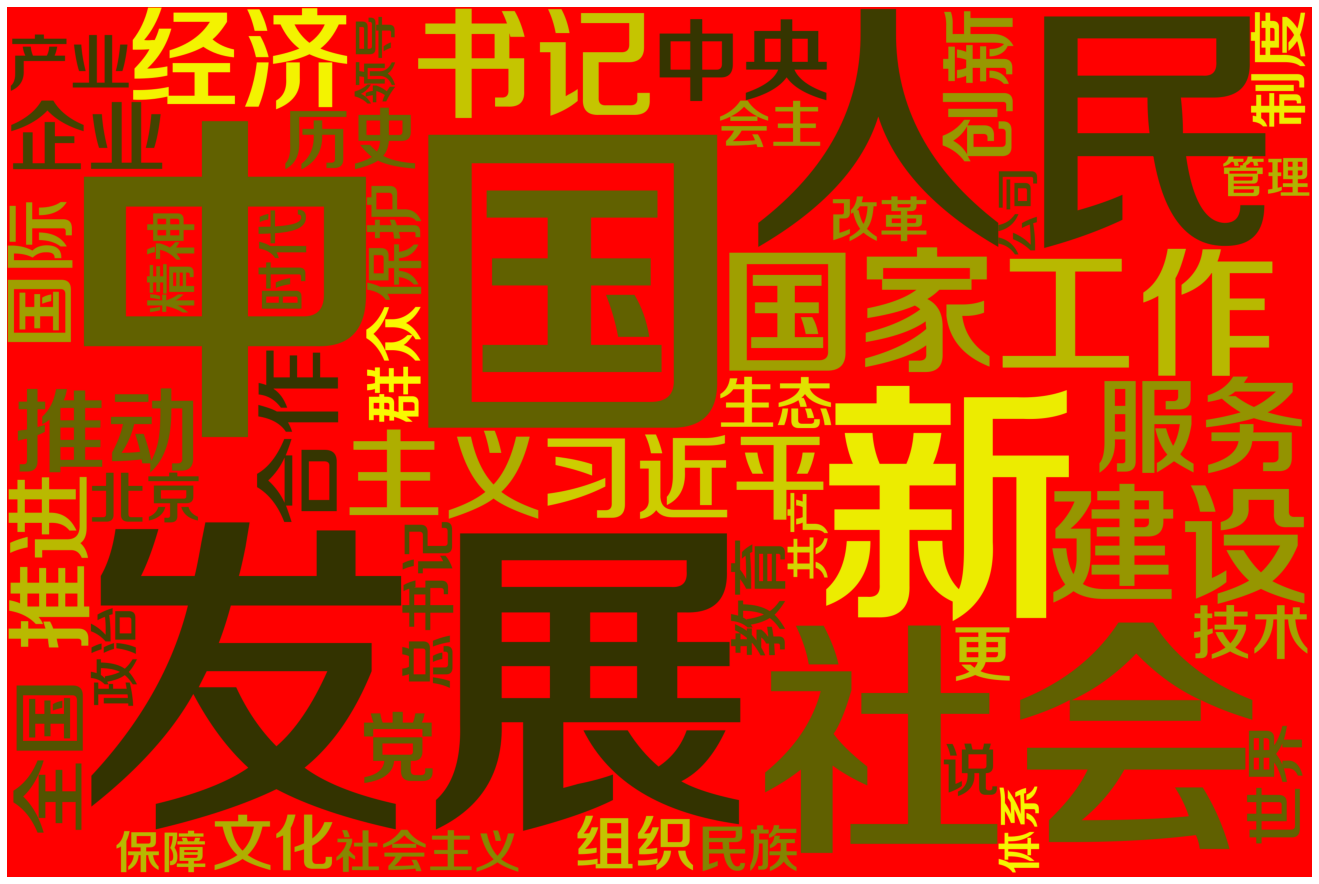

In [21]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(font_path='../input/fonts-on-mac/Fonts/方正正中黑简体.TTF',width=3000,height=2000,background_color="red", max_words=50,color_func=wordcloud.get_single_color_func("yellow"))
wc.generate_from_frequencies(word_count)

wc.to_file("People's Daily WordCloud Zh.png")

plt.figure(figsize=(24,16))
plt.imshow(plt.imread("./People's Daily WordCloud Zh.png"))
plt.axis("off")
plt.show()

### 2.4 translate to English with YouDao API

In [22]:
import json
import requests
import re

def translator(str):
    """
    input : str
    output：translation
    """
    # API
    url = 'http://fanyi.youdao.com/translate?smartresult=dict&smartresult=rule&smartresult=ugc&sessionFrom=null'
    key = {
        'type': "AUTO",
        'i': str,
        "doctype": "json",
        "version": "2.1",
        "keyfrom": "fanyi.web",
        "ue": "UTF-8",
        "action": "FY_BY_CLICKBUTTON",
        "typoResult": "true"
    }
    # key
    response = requests.post(url, data=key)
    if response.status_code == 200:
        
        result = json.loads(response.text)
        translation = result['translateResult'][0][0]['tgt']
        return translation
    else:
        print("failed to use 有道 API")
        return None


In [23]:
translator('英文')

'English'

In [24]:
import re
def removeElse(s:str):
    pattern=r'^The \b|^To \b|\b of$|\b of the$|\b the$|^At the\b|\b are$'
    return re.sub(pattern,"",s)


In [25]:
En_word_count={}
for word in word_ds.head(50).index:
    En_word_count[removeElse(translator(word))]=word_count[word]
 
En_word_ds=pd.DataFrame(En_word_count,index=[0])
En_word_ds=En_word_ds.T
En_word_ds.columns=['count']

En_word_ds.sort_values(by=['count'],ascending=False,inplace=True)
En_word_ds.head(20)

,count
China,57086
development,55830
people's,31007
new,30087
social,28016
work,27837
countries,27819
construction,27714
secretary,23462
economic,20293


### 2.5 create English WordCloud

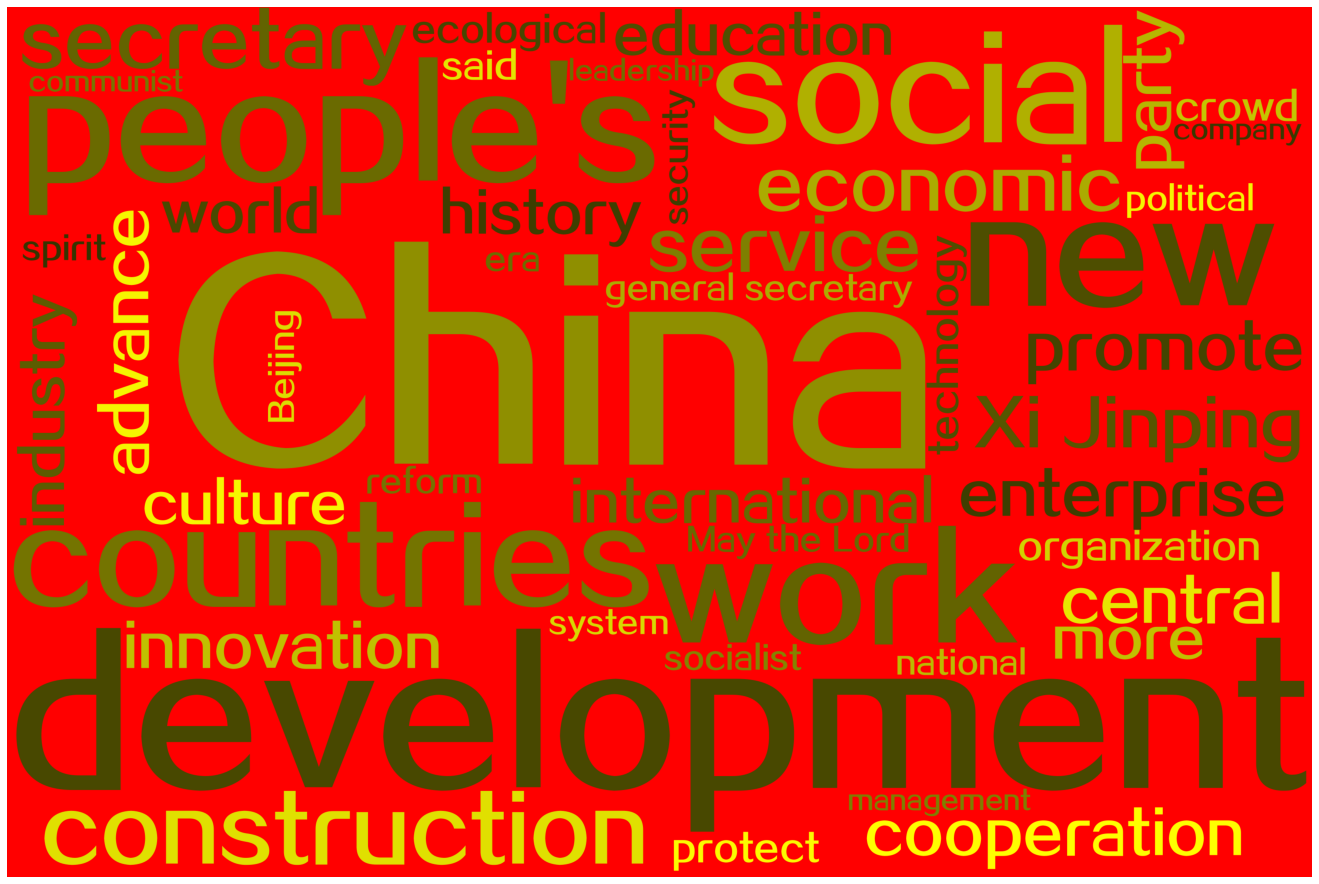

In [26]:
wc = WordCloud(font_path='../input/fonts-on-mac/Fonts/方正正中黑简体.TTF',width=3000,height=2000,background_color="red", max_words=50,color_func=wordcloud.get_single_color_func("yellow"))
wc.generate_from_frequencies(En_word_count)

wc.to_file("People's Daily WordCloud English.png")

plt.figure(figsize=(24,16))
plt.imshow(plt.imread("./People's Daily WordCloud English.png"))
plt.axis("off")
plt.show()

## 3. mix English and Chinese and generate WordCloud

In [27]:
from random import choice
Rand_word_count={}
for word in word_ds.head(50).index:
    if choice(['En','Zh']) == 'En':
        Rand_word_count[removeElse(translator(word))]=word_count[word]
    else:
        Rand_word_count[word]=word_count[word]
        
Rand_word_ds=pd.DataFrame(Rand_word_count,index=[0])
Rand_word_ds=Rand_word_ds.T
Rand_word_ds.columns=['count']

Rand_word_ds.sort_values(by=['count'],ascending=False,inplace=True)
Rand_word_ds.head(20)

,count
中国,57086
development,55830
people's,31007
新,30087
social,28016
工作,27837
countries,27819
建设,27714
书记,23462
economic,20293


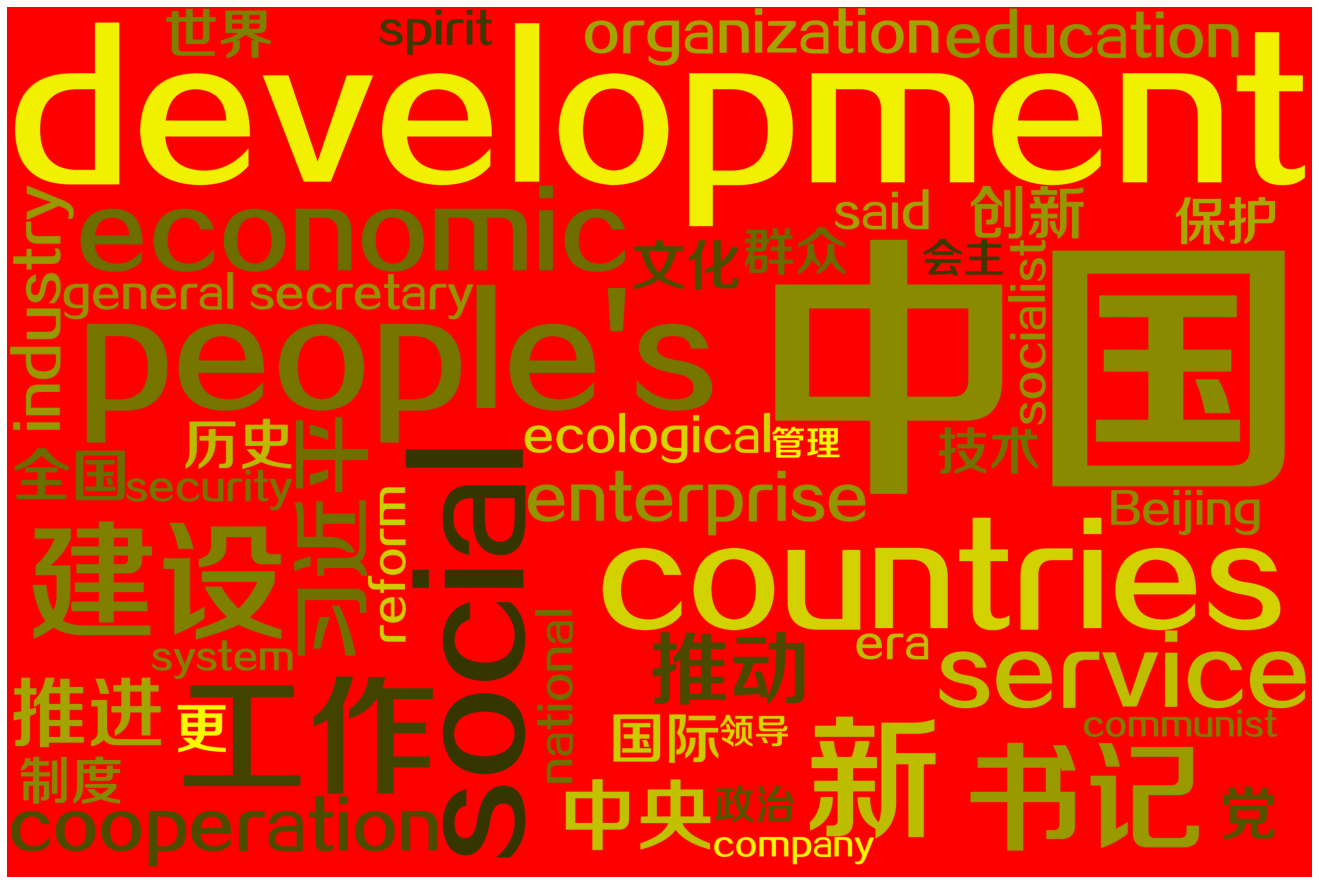

In [28]:
wc = WordCloud(font_path='../input/fonts-on-mac/Fonts/方正正中黑简体.TTF',width=3000,height=2000,background_color="red", max_words=50,color_func=wordcloud.get_single_color_func("yellow"))
wc.generate_from_frequencies(Rand_word_count)

wc.to_file("People's Daily WordCloud Both Zh and En.png")

plt.figure(figsize=(24,16))
plt.imshow(plt.imread("./People's Daily WordCloud Both Zh and En.png"))
plt.axis("off")
plt.show()